# Final Project - Modeling

DUE: April 23, 2024 (Tue)  
Pair Programming: Optional, but highly encouraged  
Name(s): Harrison Halesworth 
Class: CSCI 349 - Intro to Data Mining  
Section: 01-11am
Semester: Spring 2024  
Instructors: Brian King, Joshua Stough

In [18]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD
from tensorflow.keras.losses import categorical_crossentropy
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from keras.activations import relu, tanh
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_pickle('./data/data.pkl')

In [3]:
df.head()

,Gender,Age,UREA,CR,HBA1C,CHOL,TG,HDL,LDL,VLDL,BMI,Target
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [4]:
X = df.drop("Target", axis=1)
y = df["Target"]

In [5]:
X.head()

,Gender,Age,UREA,CR,HBA1C,CHOL,TG,HDL,LDL,VLDL,BMI
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0


In [6]:
y.head()

0    N
1    N
2    N
3    N
4    N
Name: Target, dtype: category
Categories (3, object): ['N', 'P', 'Y']

In [8]:
X_encoded = pd.get_dummies(X, columns=['Gender'], drop_first=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Using the random forest ensemble classifier to deal with the built-in class imbalance

In [14]:
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)
rf_predictions_train = rf_classifier.predict(X_train)
rf_predictions = rf_classifier.predict(X_test)

print("Random Forest Classifier(train):")
print(classification_report(y_train, rf_predictions_train))

print("Random Forest Classifier(test):")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier(train):
              precision    recall  f1-score   support

           N       1.00      1.00      1.00        82
           P       1.00      1.00      1.00        47
           Y       1.00      1.00      1.00       671

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Random Forest Classifier(test):
              precision    recall  f1-score   support

           N       0.95      0.95      0.95        21
           P       1.00      1.00      1.00         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200



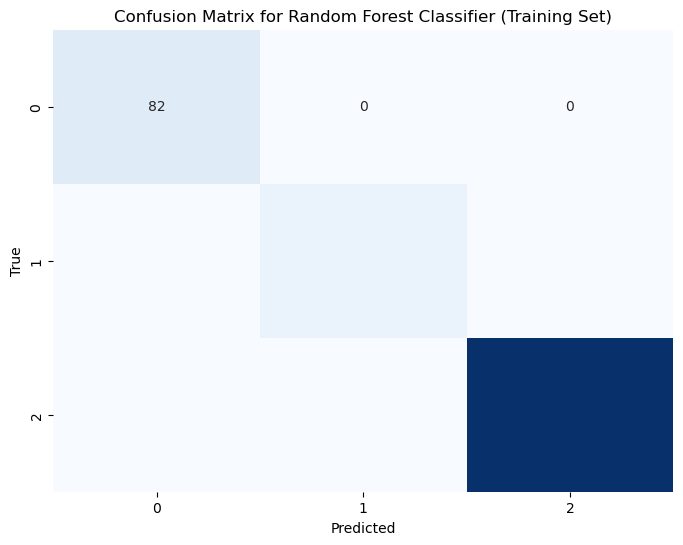

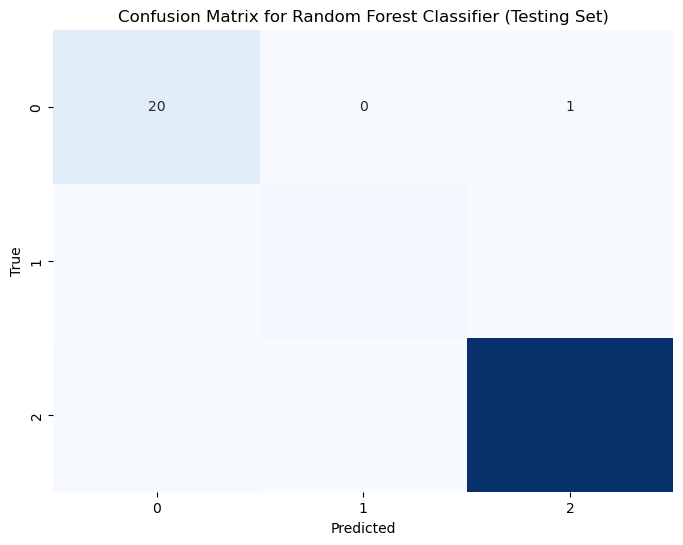

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train, rf_predictions_train), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest Classifier (Training Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest Classifier (Testing Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Using the gradient boosting classifier to deal with the built-in class imbalance

In [16]:
gb_classifier = GradientBoostingClassifier(random_state=0)
gb_classifier.fit(X_train, y_train)
gb_predictions_train = gb_classifier.predict(X_train)
gb_predictions = gb_classifier.predict(X_test)

print("\nGradient Boosting Classifier(train):")
print(classification_report(y_train, gb_predictions_train))

print("\nGradient Boosting Classifier(test):")
print(classification_report(y_test, gb_predictions))


Gradient Boosting Classifier(train):
              precision    recall  f1-score   support

           N       1.00      1.00      1.00        82
           P       1.00      1.00      1.00        47
           Y       1.00      1.00      1.00       671

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Gradient Boosting Classifier(test):
              precision    recall  f1-score   support

           N       0.95      0.90      0.93        21
           P       1.00      1.00      1.00         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.98      0.98       200



As you can see both ensemble classification techniques performed very similarly, both nearing 100% accuracy. Let's see if we can try and use grid search to try and perfect performance on the test data.

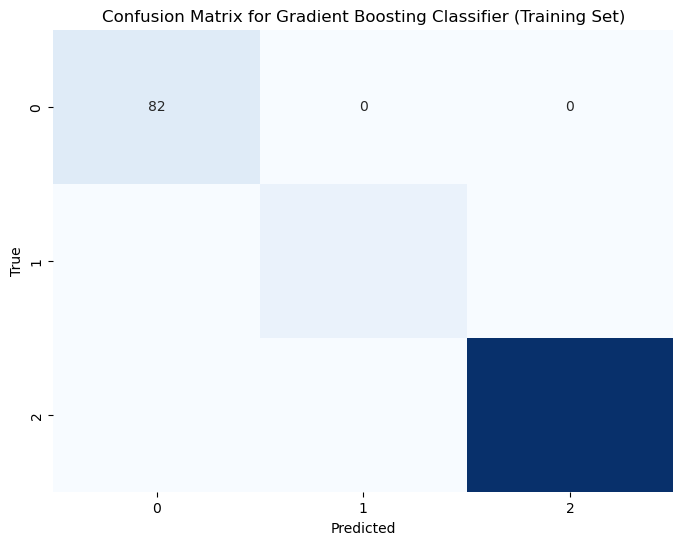

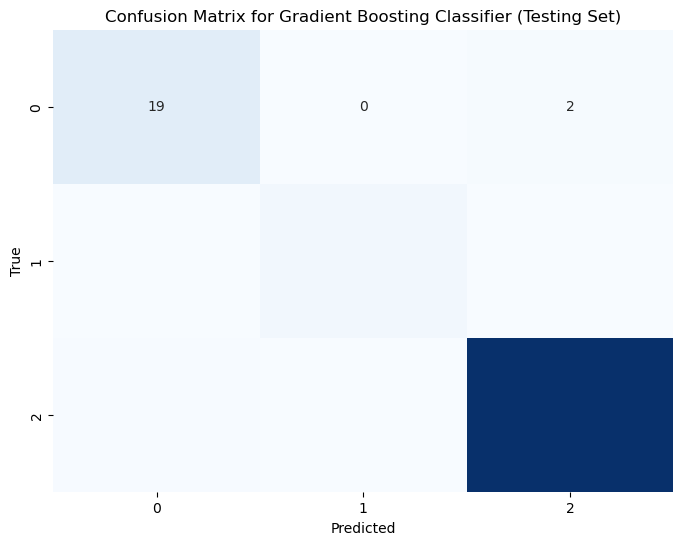

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train, gb_predictions_train), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Gradient Boosting Classifier (Training Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, gb_predictions), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Gradient Boosting Classifier (Testing Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [50]:
%%time

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_test)

print("Best Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest Classifier:
              precision    recall  f1-score   support

           N       0.95      0.95      0.95        21
           P       1.00      1.00      1.00         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200

CPU times: total: 5.17 s
Wall time: 1min 4s


In [51]:
%%time

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid=gb_param_grid, cv=5, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)

best_gb_model = gb_grid_search.best_estimator_
gb_predictions = best_gb_model.predict(X_test)

print("\nBest Gradient Boosting Classifier:")
print(classification_report(y_test, gb_predictions))

Fitting 5 folds for each of 486 candidates, totalling 2430 fits

Best Gradient Boosting Classifier:
              precision    recall  f1-score   support

           N       0.95      0.95      0.95        21
           P       1.00      1.00      1.00         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200

CPU times: total: 31.3 s
Wall time: 20min 30s


Even with hyperparameter tuning through gridsearch I was unable to get perfect performance. I will now look to use another strategy for dealing with the class imbalance and maybe use some other modeling strategies as well. Let's use SMOTE in tandem with the random forest classifier to try and deal with the imbalance.

In [11]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_classifier.predict(X_test)

print("Random Forest Classifier with SMOTE:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier with SMOTE:
              precision    recall  f1-score   support

           N       0.95      1.00      0.98        21
           P       1.00      1.00      1.00         6
           Y       1.00      0.99      1.00       173

    accuracy                           0.99       200
   macro avg       0.98      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



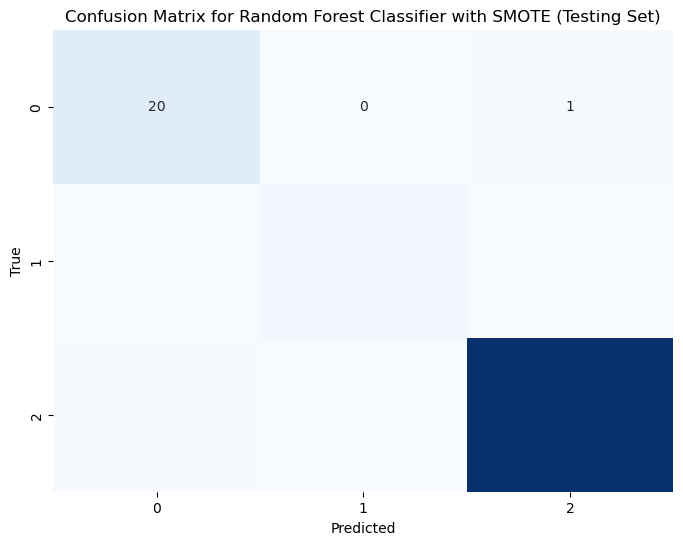

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest Classifier with SMOTE (Testing Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Using SMOTE in tandem with random forests gave us our best performance so far, let's try it with gradient boosting now.

In [12]:
gb_classifier = GradientBoostingClassifier(random_state=0)
gb_classifier.fit(X_train_resampled, y_train_resampled)
gb_predictions = gb_classifier.predict(X_test)

print("\nGradient Boosting Classifier with SMOTE:")
print(classification_report(y_test, gb_predictions))


Gradient Boosting Classifier with SMOTE:
              precision    recall  f1-score   support

           N       0.95      1.00      0.98        21
           P       0.86      1.00      0.92         6
           Y       1.00      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.94      1.00      0.96       200
weighted avg       0.99      0.99      0.99       200



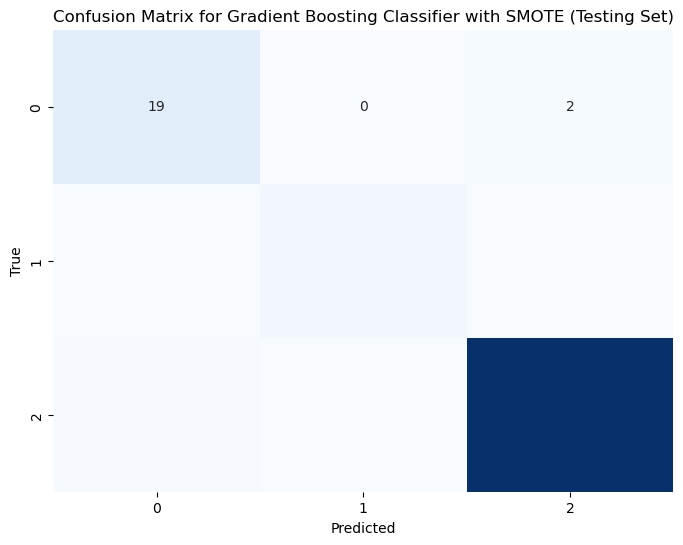

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, gb_predictions), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Gradient Boosting Classifier with SMOTE (Testing Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [24]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
dt_predictions = dt_classifier.predict(X_test)

# Print classification report
print("\nDecision Tree Classifier with SMOTE:")
print(classification_report(y_test, dt_predictions))


Decision Tree Classifier with SMOTE:
              precision    recall  f1-score   support

           N       0.95      0.95      0.95        21
           P       0.86      1.00      0.92         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.93      0.98      0.96       200
weighted avg       0.99      0.98      0.99       200



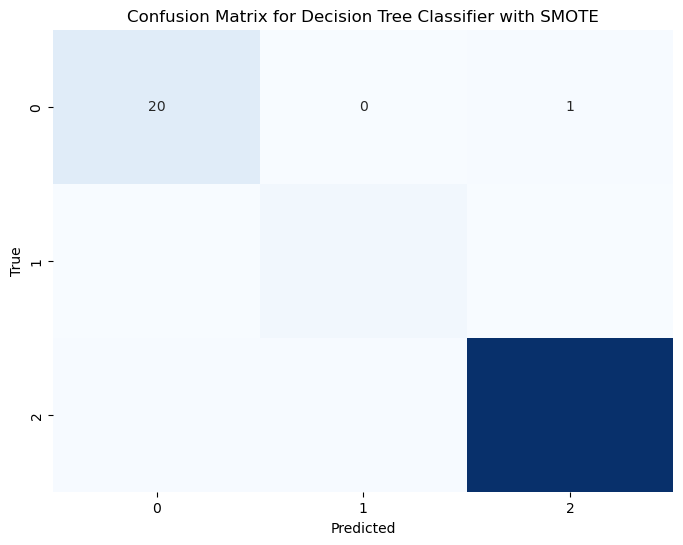

In [31]:
conf_matrix = confusion_matrix(y_test, dt_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Decision Tree Classifier with SMOTE")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()